**Problem 6 (Mott Question 7-40)**

Design a chain drive to provide the required power and speed to the machinery in design problem 7-41. Specify the chain size, the sizes and number of teeth in the sprockets, the number of chain links (pitches), lubrication requirements, and the center line distance.

DriveR: 6 Cylinder Engine               Speed = 500rpm        Input Power = 40 HP
DriveN: Heavy Conveyor              Speed  = 250  rpm (nominal)

In [7]:
n_1 = 500 # rpm
n_2 = 250 # rpm

H_in = 40 # hp

VR_nom = n_1 / n_2
print(VR_nom)

2.0


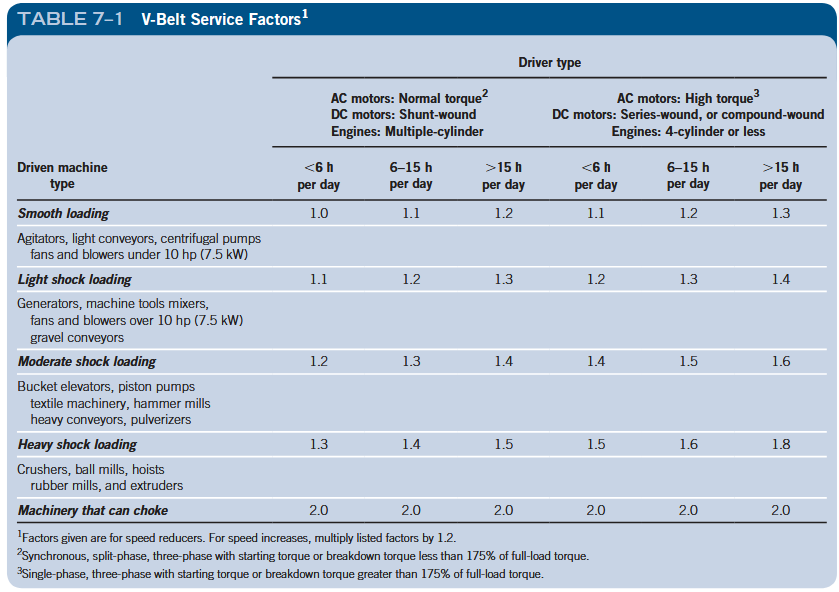
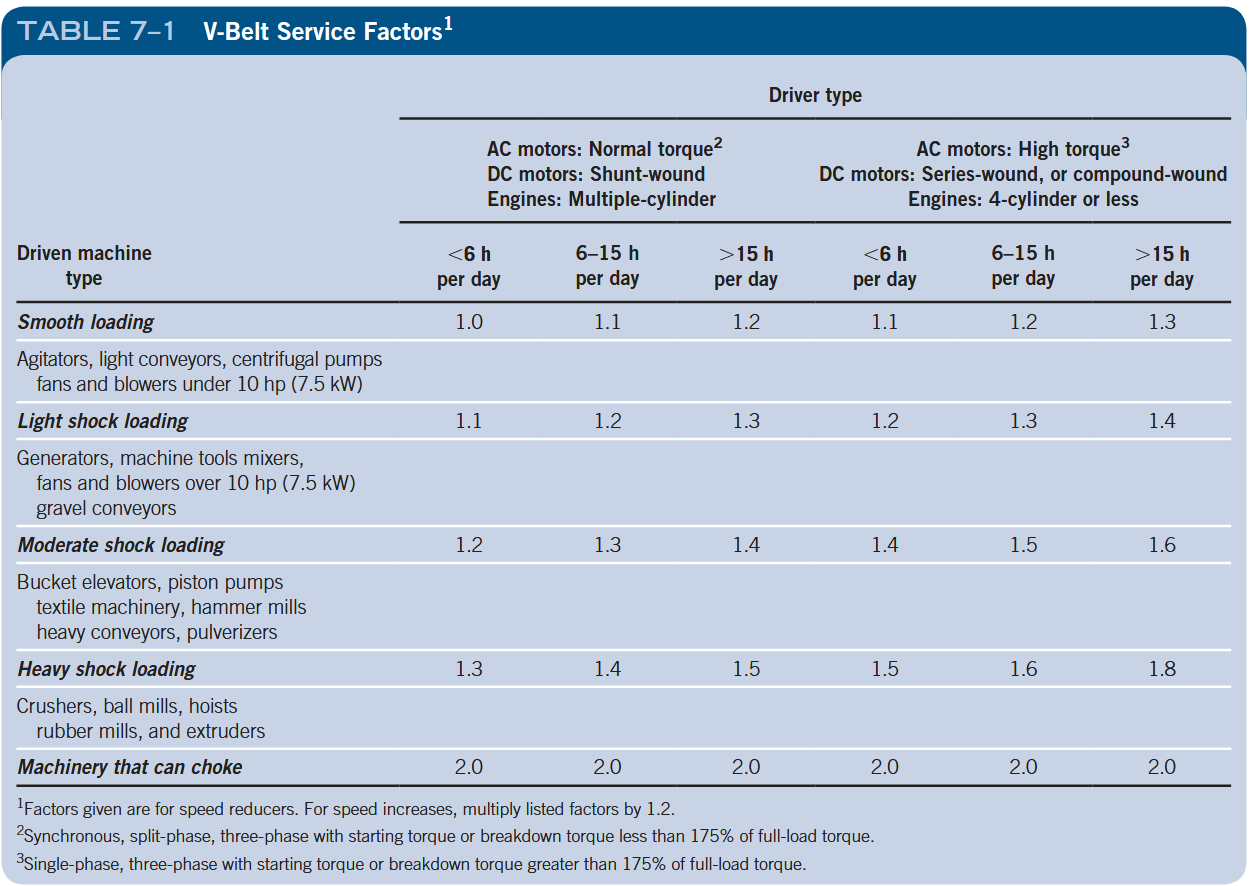

In [ ]:
# T7-1: 6-cylinder, Moderate shock, Unspecified use time per day so assume max.
K_s = 1.4
H_des = H_in * K_s
print(H_des)

At low speeds and high power, we will need a heavy chain. Select No. 80.

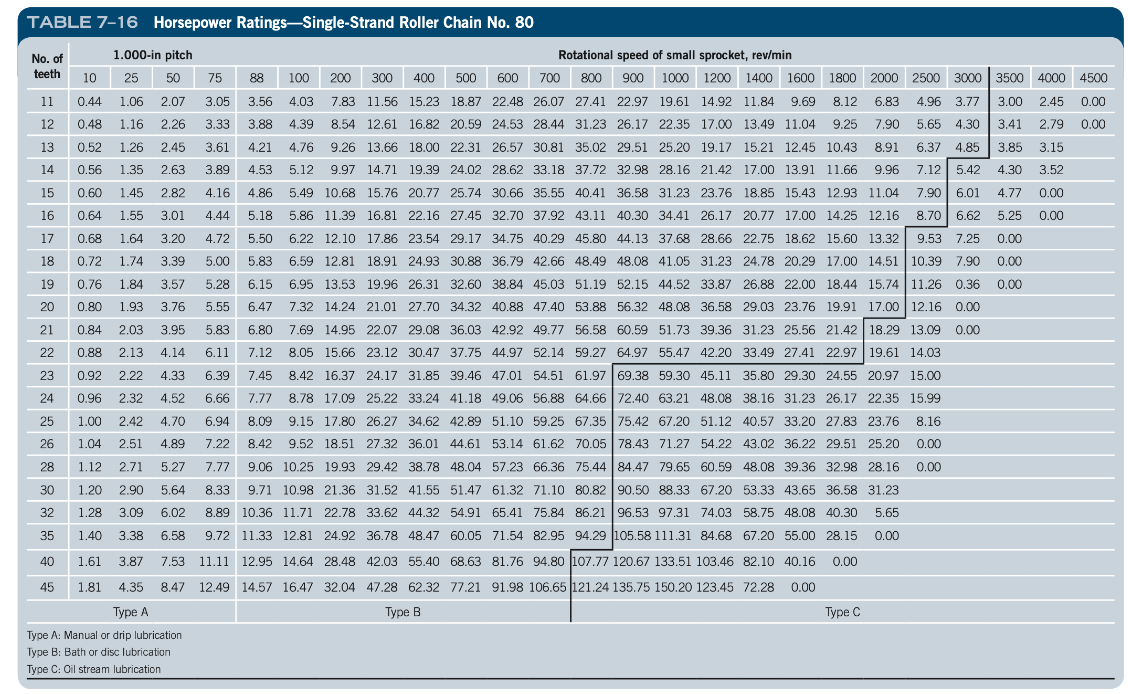

In [61]:
chain_number = 80

As we will need a ratio of 2, and we want at least 17 teeth, our options are 17/34 to 22/44. But things aren't perfect...

In [62]:
import numpy as np

sprocket_teeth = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 35, 40, 45]
sprocket_pairs = []
ratio_error = []
for N1_guess in sprocket_teeth:
    for N2_guess in sprocket_teeth:
        actual_ratio = N2_guess / N1_guess
        sprocket_pairs.append((N1_guess, N2_guess))
        ratio_error.append(np.abs(actual_ratio - VR_nom) / actual_ratio)
sprocket_pairs = np.array(sprocket_pairs)
ratio_error = np.array(ratio_error)
sort_indices = np.argsort(ratio_error)
sorted_sprocket_pairs = sprocket_pairs[sort_indices]
sorted_errors = ratio_error[sort_indices]

for i in range(8):
    N1, N2 = sorted_sprocket_pairs[i]
    print(f"N1 = {N1:<5.2f}, N2 = {N2:<10.2f} Ratio = {N2/N1:.4f}, Fractional Error = {sorted_errors[i]:.4f}")

N1 = 20.00, N2 = 40.00      Ratio = 2.0000, Fractional Error = 0.0000
N1 = 22.00, N2 = 45.00      Ratio = 2.0455, Fractional Error = 0.0222
N1 = 23.00, N2 = 45.00      Ratio = 1.9565, Fractional Error = 0.0222
N1 = 17.00, N2 = 35.00      Ratio = 2.0588, Fractional Error = 0.0286
N1 = 18.00, N2 = 35.00      Ratio = 1.9444, Fractional Error = 0.0286
N1 = 19.00, N2 = 40.00      Ratio = 2.1053, Fractional Error = 0.0500
N1 = 21.00, N2 = 40.00      Ratio = 1.9048, Fractional Error = 0.0500
N1 = 17.00, N2 = 32.00      Ratio = 1.8824, Fractional Error = 0.0625


Since a range was not specified for the ratio, I'll use the configuration with an exact match despite the risk of harmonics.

In [63]:
N1 = 20
N2 = 40

H_tab = 34.32

In [ ]:
strand_factors = [1.0, 1.7, 2.5, 3.3]
i = 0
while strand_factors[i] * H_tab < H_des:
    i += 1

chain_count = i + 1
H_a = strand_factors[i] * H_tab
print(H_a)
print(chain_count)

In [ ]:
# From the table
lubrication_required = "bath or drip lubrication"

In [68]:
p = chain_number // 10 * 0.25 # in

PD1 = p / np.sin(np.pi / N1)
PD2 = p / np.sin(np.pi / N2)

print(PD1, PD2)

12.784906442999324 25.49098968636475


In [77]:
# Recommended between 30-50, so let's choose 40 pitches.

CD_target = 40

In [78]:
L_c = 2 * CD_target + (N1 + N2) / 2 + (N2 - N1) ** 2 / (4 * np.pi ** 2 * CD_target)
print(L_c)

110.25330295910584


In [82]:
# Let's say 110 pitches; and compute the actual center distance
pitches = 110

B = pitches - (N1 + N2) / 2
CD = 1/4 * (B + np.sqrt(B**2 - 8 * (N1 - N2)**2 / (4 * np.pi ** 2)))
print(CD)

39.87294494577699


In [83]:
print(f"Chain number: No. {chain_number}")
print(f"Chain count: {chain_count}")
print(f"Sprocket sizes: {D1}, {D2}")
print(f"Sprocket tooth count: {N1}, {N2}")
print(f"Number of pitches: {pitches:.0f}")
print(f"Lubrication requirements: {lubrication_required}")
print(f"Center line distance: {CD:.3f}")

Chain number: No. 80
Chain count: 2
Sprocket sizes: 10.8, 21.1
Sprocket tooth count: 20, 40
Number of pitches: 110
Lubrication requirements: bath or drip lubrication
Center line distance: 39.873
